# 1 Lab

In [30]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [31]:
# Importing the libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plot Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

Загружаем iris dataset из scikit learn

In [32]:
from sklearn import linear_model
from sklearn.datasets import load_iris

# Import the data
iris = load_iris()

# Getting the response and target variables
X = iris.data
Y = iris.target

# Show built-in description of the dataset
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
# Converting it into a dataframe
iris_data = DataFrame(X, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y, columns = ['Species'])

In [34]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return'Virginica'

In [35]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [36]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [37]:
# Now we combine the features and the Target
iris = pd.concat([iris_data, iris_target], axis =1)

In [38]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Визуализация:

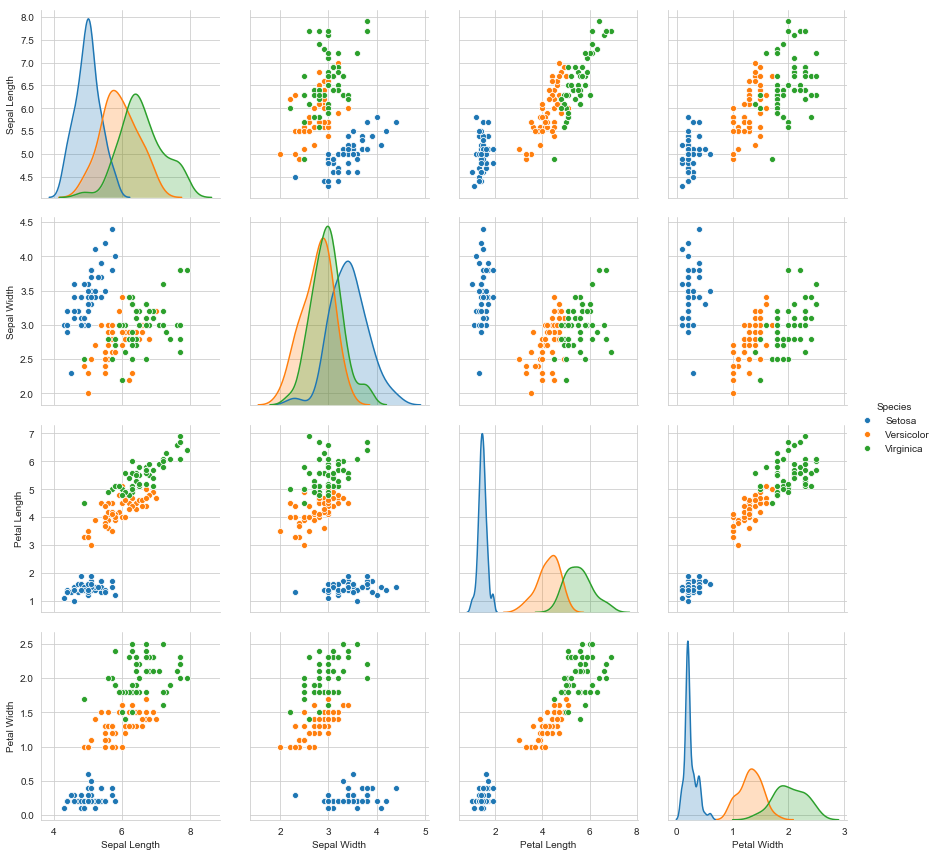

In [39]:
# pairplot of all the different features in the dataset
sns.pairplot(iris, hue = 'Species', height =3)

Здесь мы можем наблюдать, что у типа Setosa есть отличительные черты, чем у двух других типов.
Рассмотрим распределения Sepal Width для всех видов:

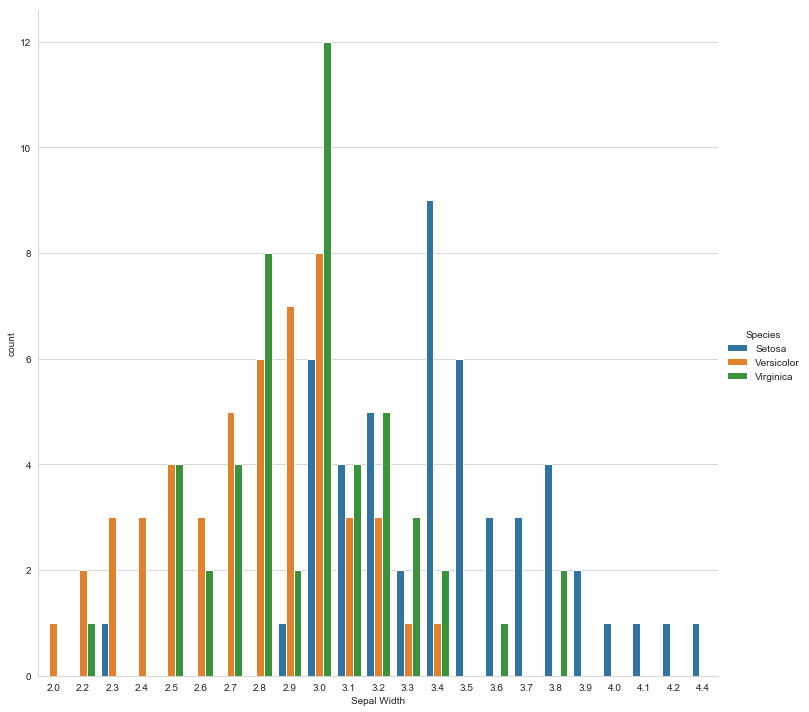

In [40]:
sns.catplot('Sepal Width', hue = 'Species', data = iris, kind = 'count', height =10)

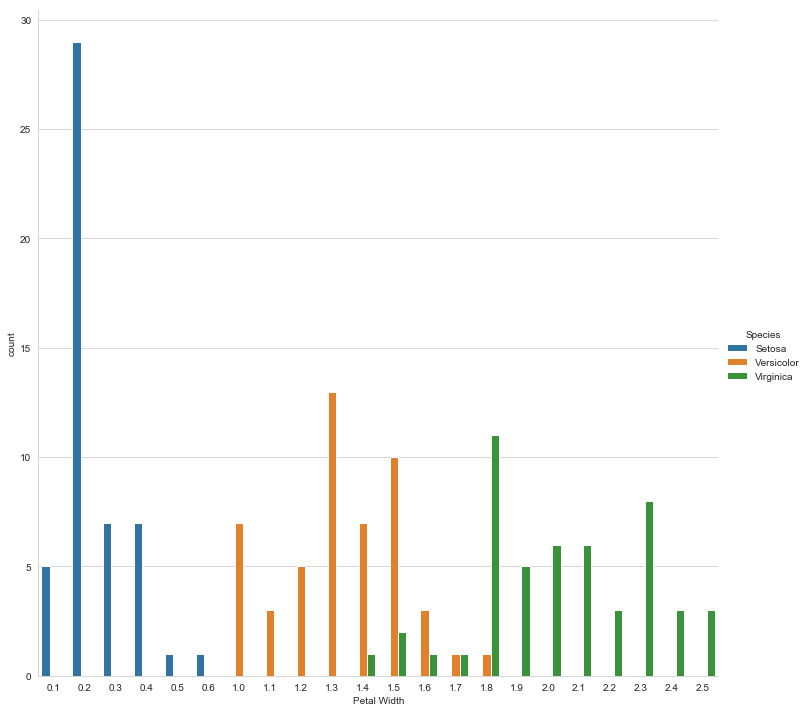

In [41]:
# For Petal.width
sns.catplot('Petal Width',  hue = 'Species', data = iris, kind = 'count', height =10)

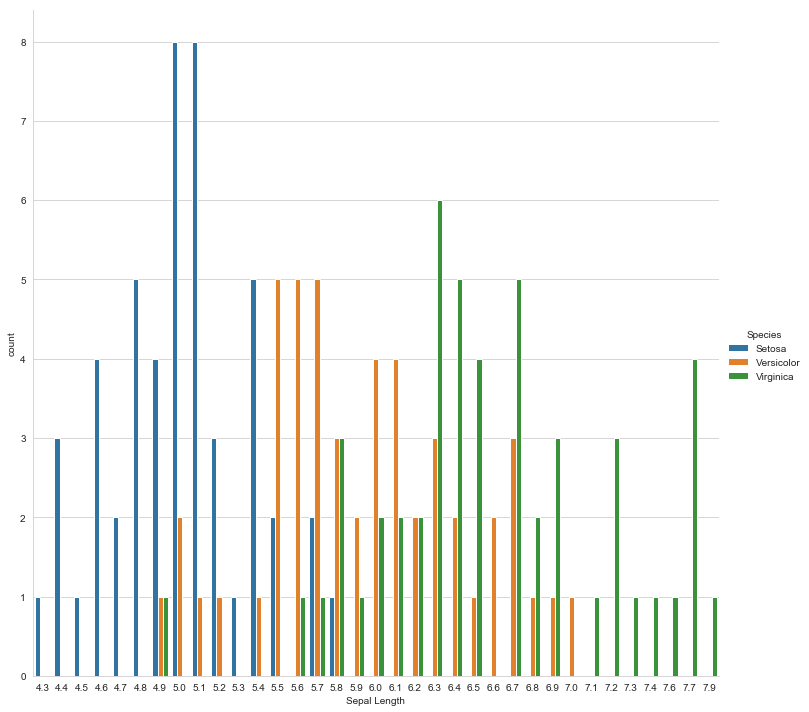

In [42]:
# For Sepal Length
sns.catplot('Sepal Length',  hue = 'Species', data = iris, kind = 'count', height =10)

# KNN for Classification

In [46]:
# Import from Scikit Learn
from sklearn.neighbors import KNeighborsClassifier

# lets start with clusters, k = 3

# Import the KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the data
knn.fit(X_train, Y_train)

# Predict X_train
Y_pred = knn.predict(X_test)

# Check Accuracy on the test set
print (metrics.accuracy_score(Y_test, Y_pred))



0.95


Таким образом, мы увидели, что использование k = 3 дает нам точность 95%.

Запустим для диапазон значений K и найдем оптимальное значение:

In [47]:
# test K values through 1 to 20
k_range = range(1,21)

# Set an empty list 
accuracy = []

# repeat for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))


Построим разные точности:    

Text(0, 0.5, 'Accuracy')

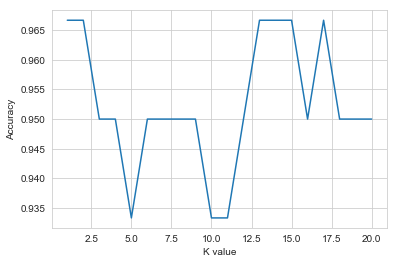

In [48]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel("Accuracy")

Таким образом, мы наблюдаем, что наивысшая точность для более низкого значения k получается при k около 1. Посмотрим, сколько будет точное значение.


In [49]:
accuracy

[0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95,
 0.9333333333333333,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9333333333333333,
 0.9333333333333333,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.9666666666666667,
 0.95,
 0.95,
 0.95]

Таким образом, мы видим, что максимальная точность для значения k равна 1 или 2

# Support Vector Machines (SVM) Classification

In [50]:
# Loading the SVM library
from sklearn.svm import SVC

# Fitting SVM model
model = SVC()
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
# predicting on the test set
predicted = model.predict(X_test)
expected = Y_test


In [52]:
# Checking performance metrics
print(metrics.accuracy_score(predicted,expected))

0.9666666666666667


Мы получили точность 96.7% с использованием SVM модели.